# Customer Churn Analysis

### Problem Statement:

Customer churn is when a company’s customers stop doing business with that company. Businesses are very keen on measuring churn because keeping an existing customer is far less expensive than acquiring a new customer. New business involves working leads through a sales funnel, using marketing and sales budgets to gain additional customers. Existing customers will often have a higher volume of service consumption and can generate additional customer referrals.

Customer retention can be achieved with good customer service and products. But the most effective way for a company to prevent attrition of customers is to truly know them. The vast volumes of data collected about customers can be used to build churn prediction models. Knowing who is most likely to defect means that a company can prioritise focused marketing efforts on that subset of their customer base.

Preventing customer churn is critically important to the telecommunications sector, as the barriers to entry for switching services are so low.

You will examine customer data from IBM Sample Data Sets with the aim of building and comparing several customer churn prediction models

# First let us import the libraries

In [1]:
import pandas as pd
import numpy as np

#importing ploting libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading the dataset

In [3]:
churn = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv')
churn

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95        1889.5   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 21 columns]

In [4]:
### Lets check top 5 rows and bottom 5 rows pf the dataset using head and tail:
churn.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
churn.tail()

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
7038              Yes               Mailed check          84.80        1990.5   
7039              Yes    Credit card (automatic)         103.20        7362.9   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40         306.6   
7042              Yes  Bank transfer (automatic)         105.65        6844.5   

     Churn  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[5 rows x 21 columns]

In [6]:
### Let us check the random rows in our dataset:
churn.sample(10)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
5352  6559-PDZLR    Male              0      No         No      26   
3537  5062-CJJKH    Male              0     Yes        Yes      25   
2958  2576-HXMPA  Female              0      No         No       1   
22    1066-JKSGK    Male              0      No         No       1   
6500  9236-NDUCW  Female              0      No         No      21   
3039  5456-ITGIC    Male              1     Yes         No      72   
3839  8387-UGUSU  Female              0     Yes        Yes      15   
5481  8473-VUVJN    Male              1      No         No       1   
6833  9129-UXERG  Female              1      No         No      18   
2594  3096-YXENJ  Female              0     Yes         No      65   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
5352          Yes                No     Fiber optic                   No  ...   
3537          Yes                No             DSL                   No  ...   
2958          Yes                No              No  No internet service  ...   
22            Yes                No              No  No internet service  ...   
6500           No  No phone service             DSL                  Yes  ...   
3039           No  No phone service             DSL                  Yes  ...   
3839          Yes                No              No  No internet service  ...   
5481          Yes               Yes     Fiber optic                   No  ...   
6833          Yes               Yes     Fiber optic                   No  ...   
2594          Yes               Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
5352                  Yes                  Yes                  Yes   
3537                  Yes                   No                   No   
2958  No internet service  No internet service  No internet service   
22    No internet service  No internet service  No internet service   
6500                   No                  Yes                   No   
3039                  Yes                  Yes                  Yes   
3839  No internet service  No internet service  No internet service   
5481                   No                   No                   No   
6833                   No                  Yes                  Yes   
2594                  Yes                  Yes                  Yes   

          StreamingMovies        Contract PaperlessBilling  \
5352                  Yes  Month-to-month              Yes   
3537                   No        One year               No   
2958  No internet service  Month-to-month               No   
22    No internet service  Month-to-month               No   
6500                   No        Two year               No   
3039                  Yes        Two year              Yes   
3839  No internet service  Month-to-month               No   
5481                   No  Month-to-month              Yes   
6833                  Yes  Month-to-month              Yes   
2594                  Yes        Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges Churn  
5352           Electronic check          98.65          2537    No  
3537               Mailed check          53.65       1355.45    No  
2958    Credit card (automatic)          19.55         19.55    No  
22                 Mailed check          20.15         20.15   Yes  
6500               Mailed check          35.10         770.4    No  
3039    Credit card (automatic)          64.45        4641.1    No  
3839               Mailed check          20.05         284.3    No  
5481           Electronic check          73.65         73.65   Yes  
6833    Credit card (automatic)         103.60       1806.35    No  
2594  Bank transfer (automatic)         107.65       7082.85    No  

[10 rows x 21 columns]

# Exploratory Data Analysis (EDA)

In [7]:
churn.shape

(7043, 21)

- We can see that our dataset is having 7043 rows and 21 columns.

In [8]:
# Let us check all the columns in our dataset:
churn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

- We can see all 21 column names as above.

Observation :
    1. Our target variable is 'Churn' - We need to predict if the customer has left the company or not.
    
    2. Demographic information of customer reflects in these columns - 'customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
    
    3. The services for which customer has opted reflects in this columns - 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
    
    4. The customer details which lets us know for how long the customer has been with the company - 'tenure','Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges'

In [9]:
# Let us check the datatypes of all the columns:
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
# Lets us check the information and count of dtypes in the columns:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- As per above observations we can see that most of the columns i.e 18 are of object datatype and 3 are of numerical datatype.

- Also we can see that 'Monthly Charges' column is of float datatype but 'Total Charges' column is of object datatype.

#### Let us seperate the numerical and object datatypes:

In [11]:
object_datatype=[]

for i in churn.dtypes.index:
    if churn.dtypes[i] == 'object':
        object_datatype.append(i)
object_datatype

['customerID',
 'gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'TotalCharges',
 'Churn']

In [12]:
numerical_datatype=[]

for i in churn.dtypes.index:
    if churn.dtypes[i] != 'object':
        numerical_datatype.append(i)
numerical_datatype

['SeniorCitizen', 'tenure', 'MonthlyCharges']

- Now we have seperated the object & numerical datatype columns.

### As per above observation we will have to convert the datatype of 'TotalCharges' to numerical datatype.

In [13]:
churn['TotalCharges'] = pd.to_numeric(churn.TotalCharges, errors='coerce')

- We have successfully converted the datatype of 'TotalCharges' from object to numeric value.

In [14]:
# Let us check the information of tota
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- TotalCharges column is now converted to float datatype and also we can see that it is reflecting only 7032 non-null values but other columns are reflecting as 7043 non-null values, This means that 'TotalCharges' column has some null values.

# Checking Null values

In [15]:
churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

- We can see that there are 11 null values in 'TotalCharges' column.

- We will need to handle this missing values.

In [16]:
# Let us check the missing data in column 'TotalCharges' 
churn[np.isnan(churn['TotalCharges'])]

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No phone service             DSL                  Yes  ...   
753           Yes                No              No  No internet service  ...   
936           Yes                No             DSL                  Yes  ...   
1082          Yes               Yes              No  No internet service  ...   
1340           No  No phone service             DSL                  Yes  ...   
3331          Yes                No              No  No internet service  ...   
3826          Yes               Yes              No  No internet service  ...   
4380          Yes                No              No  No internet service  ...   
5218          Yes                No              No  No internet service  ...   
6670          Yes               Yes             DSL                   No  ...   
6754          Yes               Yes             DSL                  Yes  ...   

         DeviceProtection          TechSupport          StreamingTV  \
488                   Yes                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                   No                  Yes   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                   No                  Yes                   No   

          StreamingMovies  Contract PaperlessBilling  \
488                    No  Two year              Yes   
753   No internet service  Two year               No   
936                   Yes  Two year               No   
1082  No internet service  Two year               No   
1340                   No  Two year               No   
3331  No internet service  Two year               No   
3826  No internet service  Two year               No   
4380  No internet service  Two year               No   
5218  No internet service  One year              Yes   
6670                   No  Two year               No   
6754                   No  Two year              Yes   

                  PaymentMethod MonthlyCharges  TotalCharges  Churn  
488   Bank transfer (automatic)          52.55           NaN     No  
753                Mailed check          20.25           NaN     No  
936                Mailed check          80.85           NaN     No  
1082               Mailed check          25.75           NaN     No  
1340    Credit card (automatic)          56.05           NaN     No  
3331               Mailed check          19.85           NaN     No  
3826               Mailed check          25.35           NaN     No  
4380               Mailed check          20.00           NaN     No  
5218               Mailed check     

- We are able to see all the 11 rows and column with NAN values, also tenure reflects 0 in this case.

- Let us check if there are more 0 values in tenure column:

In [17]:
churn[churn['tenure']==0].index

Int64Index([488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754], dtype='int64')

- We cant find any more 0 values in 'tenure' column when there are nan values in 'Totalcharges' 

# Dropping Irrelevant Columns

In [18]:
df = churn.drop(['customerID'],axis=1)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7043 rows x 20 columns]

- I have dropped the customerID column as it was not having any relevant input to our target variable.

##### Let's delete the rows with missing values in Tenure columns since there are only 11 rows and deleting them will not affect the data.

In [19]:
df.drop(labels=df[df['tenure'] == 0].index, axis=0, inplace=True)
df[df['tenure'] == 0].index

Int64Index([], dtype='int64')

- We have successfully dropped the tenure column rows which had '0' value.

# Filling the Missing values in 'TotalCharges' column

- As we can see that , we have only 11 values missing from 7043 data, we can use mean function to fill the data.

In [20]:
df.fillna(churn['TotalCharges'].mean())

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges  \
0                 Yes           Electronic check           29.85   
1                  No               Mailed check           56.95   
2                 Yes               Mailed check           53.85   
3                  No  Bank transfer (automatic)           42.30   
4                 Yes           Electronic check           70.70   
...               ...                        ...             ...   
7038              Yes               Mailed check           84.80   
7039              Yes    Credit card (automatic)          103.20   
7040              Yes           Electronic check           29.60   
7041              Yes               Mailed check           74.40   
7042              Yes  Bank transfer (automatic)          105.65   

      TotalCharges Churn  
0            29.85    No  
1          1889.50    No  
2           108.15   Yes  
3          1840.75    No  
4           151.65   Yes  
...            ...   ...  
7038       1990.50    No  
7039       7362.90    No  
7040        346.45    No  
7041        306.60   Yes  
7042       6844.50    No  

[7032 rows x 20 columns]

In [21]:
# Now let us check if there any any missing values in our dataset:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

<AxesSubplot:>

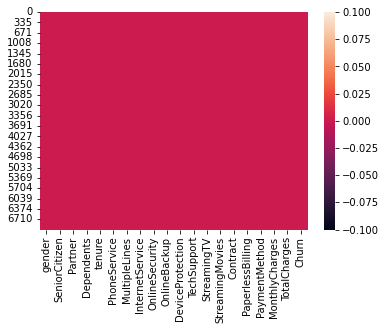

In [22]:
# Let us visualize the null values using heatmap:
sns.heatmap(df.isnull())

# Checking duplicate Values

In [23]:
df.duplicated().sum()

22

- There are 22 duplicate values in our dataset. Let us remove the duplicate values.

In [24]:
df = df[~df.duplicated()]

In [25]:
df.duplicated().sum()

0

- Now we can see that there are no duplicate values.

# Unique Values

In [26]:
df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

- From the above observation we can see that columns 'tenure','monthly charges','totalcharges' have more unique values, rest columns have 2,3,4 unique values.

In [27]:
# Let us check the value counts of our target variable:
df['Churn'].value_counts()

No     5153
Yes    1857
Name: Churn, dtype: int64

Here we can see that our data is not balanced, we will have to balance it.

In [28]:
# Let us check the value counts of object datatypes:

for columns in object_datatype:
    print(columns)
    print(churn[columns].value_counts())
    print("="*120)

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: customerID, Length: 7043, dtype: int64
gender
Male      3555
Female    3488
Name: gender, dtype: int64
Partner
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
No     4933
Yes    2110
Name: Dependents, dtype: int64
PhoneService
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64
OnlineBackup
No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64
DevicePro

- We can see that columns 'gender','partner','dependents','phoneservice','multiplelines','onlinesecurity','onlinebackup','deviceprotection','techsupport','streamingTV','Streamingmovies' all this columns has mostly only 2 unique values i.e YES or NO, and few columns consists of 3rd unique value as "No internet service"

In [29]:
# Let us check the value counts of numerical datatypes:

for columns in numerical_datatype:
    print(columns)
    print(churn[columns].value_counts())
    print("="*120)

SeniorCitizen
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
MonthlyCharges
20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64


- We can see that 'Senior Citizen' column also has only 2 unique values i.e 0 and 1, we will convert this 0 & 1 to YES and NO

In [30]:
df["SeniorCitizen"]= df["SeniorCitizen"].map({0: "No", 1: "Yes"})
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# Statistical Data:

In [31]:
df.describe()

tenure  MonthlyCharges  TotalCharges
count  7010.000000     7010.000000   7010.000000
mean     32.520399       64.888666   2290.353388
std      24.520441       30.064769   2266.820832
min       1.000000       18.250000     18.800000
25%       9.000000       35.750000    408.312500
50%      29.000000       70.400000   1403.875000
75%      56.000000       89.900000   3807.837500
max      72.000000      118.750000   8684.800000

- we can observe that count of all the 3 columns is 7010.
- minimum value is 1 and maximum value is 8684.

# Skewness:

In [32]:
df.skew()

tenure            0.233740
MonthlyCharges   -0.225686
TotalCharges      0.958322
dtype: float64

# Encoding the data using Label Encoding and Ordinal Encoding.

In [33]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

In [34]:
# Label Encoder

le = LabelEncoder()
df["Churn"] = le.fit_transform(df["Churn"])
df.head()

gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  Female            No     Yes         No       1           No   
1    Male            No      No         No      34          Yes   
2    Male            No      No         No       2          Yes   
3    Male            No      No         No      45           No   
4  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges  TotalCharges  \
0              Yes           Electronic check           29.85         29.85   
1               No               Mailed check           56.95       1889.50   
2              Yes               Mailed check           53.85        108.15   
3               No  Bank transfer (automatic)           42.30       1840.75   
4              Yes           Electronic check           70.70        151.65   

   Churn  
0      0  
1      0  
2      1  
3      0  
4      1

- Our target variable is converted to 0 and 1 using label encoder.

In [35]:
# Ordinal Encoder

oe = OrdinalEncoder()
df['gender'] = oe.fit_transform(df['gender'].values.reshape(-1,1))
df['SeniorCitizen'] = oe.fit_transform(df['SeniorCitizen'].values.reshape(-1,1))
df['Dependents'] = oe.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Partner'] = oe.fit_transform(df['Partner'].values.reshape(-1,1))
df['PhoneService'] = oe.fit_transform(df['PhoneService'].values.reshape(-1,1))
df['OnlineSecurity'] = oe.fit_transform(df['OnlineSecurity'].values.reshape(-1,1))
df['OnlineBackup'] = oe.fit_transform(df['OnlineBackup'].values.reshape(-1,1))
df['DeviceProtection'] = oe.fit_transform(df['DeviceProtection'].values.reshape(-1,1))
df['TechSupport'] = oe.fit_transform(df['TechSupport'].values.reshape(-1,1))
df['StreamingTV'] = oe.fit_transform(df['StreamingTV'].values.reshape(-1,1))
df['StreamingMovies'] = oe.fit_transform(df['StreamingMovies'].values.reshape(-1,1))
df['PaperlessBilling'] = oe.fit_transform(df['PaperlessBilling'].values.reshape(-1,1))
df['MultipleLines'] = oe.fit_transform(df['MultipleLines'].values.reshape(-1,1))
df['InternetService'] = oe.fit_transform(df['InternetService'].values.reshape(-1,1))
df['Contract'] = oe.fit_transform(df['Contract'].values.reshape(-1,1))
df['PaymentMethod'] = oe.fit_transform(df['PaymentMethod'].values.reshape(-1,1))
df.sample(15)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
388      1.0            0.0      0.0         0.0      44           1.0   
1728     0.0            0.0      0.0         0.0      45           1.0   
4241     0.0            0.0      1.0         1.0      22           1.0   
1848     0.0            0.0      0.0         0.0      38           1.0   
2371     0.0            0.0      0.0         0.0       1           1.0   
7005     1.0            0.0      1.0         0.0      23           1.0   
757      0.0            0.0      0.0         0.0       3           1.0   
3642     0.0            1.0      0.0         0.0      30           1.0   
2034     1.0            0.0      1.0         1.0      41           1.0   
4636     1.0            0.0      1.0         1.0      44           1.0   
6859     0.0            0.0      0.0         0.0      71           1.0   
1835     0.0            0.0      1.0         0.0       1           1.0   
3332     1.0            0.0      0.0         0.0       1           1.0   
720      1.0            0.0      1.0         1.0       2           1.0   
641      0.0            0.0      1.0         1.0      43           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
388             2.0              1.0             0.0           0.0   
1728            0.0              0.0             2.0           0.0   
4241            0.0              0.0             2.0           2.0   
1848            0.0              2.0             1.0           1.0   
2371            2.0              2.0             1.0           1.0   
7005            0.0              2.0             1.0           1.0   
757             0.0              2.0             1.0           1.0   
3642            2.0              1.0             0.0           2.0   
2034            0.0              0.0             2.0           2.0   
4636            0.0              2.0             1.0           1.0   
6859            2.0              1.0             2.0           2.0   
1835            0.0              0.0             0.0           0.0   
3332            0.0              0.0             0.0           0.0   
720             0.0              2.0             1.0           1.0   
641             0.0              0.0             0.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
388                2.0          0.0          0.0              2.0       0.0   
1728               2.0          2.0          2.0              2.0       2.0   
4241               2.0          0.0          0.0              0.0       0.0   
1848               1.0          1.0          1.0              1.0       1.0   
2371               1.0          1.0          1.0              1.0       0.0   
7005               1.0          1.0          1.0              1.0       1.0   
757                1.0          1.0          1.0              1.0       0.0   
3642               2.0          0.0          2.0              2.0       0.0   
2034               2.0          0.0          0.0              0.0       1.0   
4636               1.0          1.0          1.0              1.0       1.0   
6859               2.0          2.0          2.0              2.0       2.0   
1835               0.0          0.0          0.0              0.0       0.0   
3332               0.0          0.0          0.0              0.0       0.0   
720                1.0          1.0          1.0              1.0       1.0   
641                0.0          0.0          2.0              0.0       0.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
388                1.0            3.0           90.40       4063.00      0  
1728               0.0            0.0           81.65       3618.70      0  
4241               0.0            3.0           61.15       1422.05      1  
1848               0.0            3.0           19.30        755.50      0  
2371               1.0            2.0           25

- We have successfully encoded the data. using label encoder and ordinal encoder.

In [36]:
numerical_cols=[]

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numerical_cols.append(i)
numerical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

Now we can see that above all columns are numerical.

# Let us check the outliers:

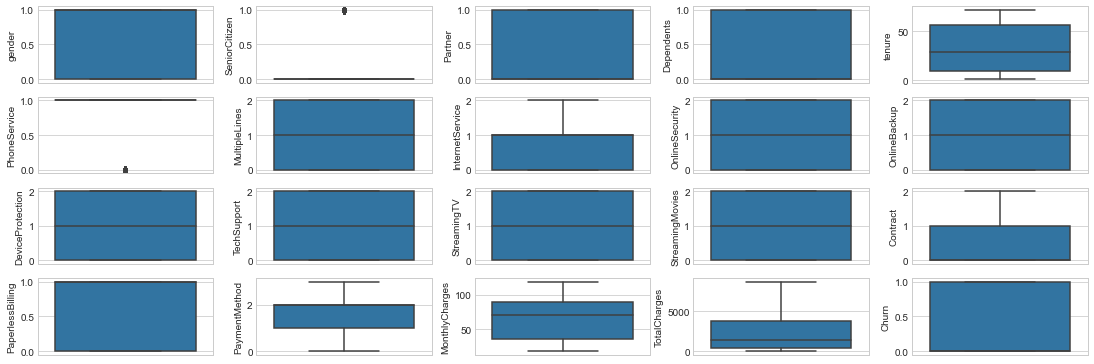

In [37]:
plt.style.use('seaborn-whitegrid')
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15,5))
index = 0
ax = ax.flatten()
for col, value in df[numerical_cols].items():
    sns.boxplot(y=col, data=df, ax=ax[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- We can see that only 2 columns have outliers i.e 'SeniorCitizen' and 'PhoneService'

# Removing Outliers

In [38]:
from scipy.stats import zscore

# Features containing outliers
features = df[['SeniorCitizen', 'PhoneService']]

# Using zscore to remove outliers

z=np.abs(zscore(features))

z

SeniorCitizen  PhoneService
0          0.440921      3.051036
1          0.440921      0.327757
2          0.440921      0.327757
3          0.440921      3.051036
4          0.440921      0.327757
...             ...           ...
7038       0.440921      0.327757
7039       0.440921      0.327757
7040       0.440921      3.051036
7041       2.267980      0.327757
7042       0.440921      0.327757

[7010 rows x 2 columns]

In [39]:
# Creating new dataframe
new_df = df[(z<3).all(axis=1)] 
new_df

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
1        1.0            0.0      0.0         0.0      34           1.0   
2        1.0            0.0      0.0         0.0       2           1.0   
4        0.0            0.0      0.0         0.0       2           1.0   
5        0.0            0.0      0.0         0.0       8           1.0   
6        1.0            0.0      0.0         1.0      22           1.0   
...      ...            ...      ...         ...     ...           ...   
7037     0.0            0.0      0.0         0.0      72           1.0   
7038     1.0            0.0      1.0         1.0      24           1.0   
7039     0.0            0.0      1.0         1.0      72           1.0   
7041     1.0            1.0      1.0         0.0       4           1.0   
7042     1.0            0.0      0.0         0.0      66           1.0   

      MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
1               0.0              0.0             2.0           0.0   
2               0.0              0.0             2.0           2.0   
4               0.0              1.0             0.0           0.0   
5               2.0              1.0             0.0           0.0   
6               2.0              1.0             0.0           2.0   
...             ...              ...             ...           ...   
7037            0.0              2.0             1.0           1.0   
7038            2.0              0.0             2.0           0.0   
7039            2.0              1.0             0.0           2.0   
7041            2.0              1.0             0.0           0.0   
7042            0.0              1.0             2.0           0.0   

      DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
1                  2.0          0.0          0.0              0.0       1.0   
2                  0.0          0.0          0.0              0.0       0.0   
4                  0.0          0.0          0.0              0.0       0.0   
5                  2.0          0.0          2.0              2.0       0.0   
6                  0.0          0.0          2.0              0.0       0.0   
...                ...          ...          ...              ...       ...   
7037               1.0          1.0          1.0              1.0       2.0   
7038               2.0          2.0          2.0              2.0       1.0   
7039               2.0          0.0          2.0              2.0       1.0   
7041               0.0          0.0          0.0              0.0       0.0   
7042               2.0          2.0          2.0              2.0       2.0   

      PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  Churn  
1                  0.0            3.0           56.95       1889.50      0  
2                  1.0            3.0           53.85        108.15      1  
4                  1.0            2.0           70.70        151.65      1  
5                  1.0            2.0           99.65        820.50      1  
6                  1.0            1.0           89.10       1949.40      0  
...                ...            ...             ...           ...    ...  
7037               1.0            0.0           21.15       1419.40      0  
7038               1.0            3.0           84.80       1990.50      0  
7039               1.0            1.0          103.20       7362.90      0  
7041               1.0            3.0           74.40        306.60      1  
7042               1.0            0.0          105.65       6844.50      0  

[6330 rows x 20 columns]

In [40]:
new_df.shape

(6330, 20)

In [41]:
df.shape

(7010, 20)

In [42]:
#checking % of data loss
((7010-6330)/7010)*100

9.700427960057063

- We have lost 9 % of data after removing the outliers.

In [43]:
new_df.skew()

gender             -0.012009
SeniorCitizen       1.817039
Partner             0.051214
Dependents          0.876365
tenure              0.231885
PhoneService        0.000000
MultipleLines       0.125394
InternetService     0.052633
OnlineSecurity      0.422269
OnlineBackup        0.167321
DeviceProtection    0.182134
TechSupport         0.409999
StreamingTV        -0.004888
StreamingMovies    -0.012832
Contract            0.627944
PaperlessBilling   -0.390918
PaymentMethod      -0.164302
MonthlyCharges     -0.405993
TotalCharges        0.895062
Churn               1.056454
dtype: float64

# Correlation

In [44]:
new_df.corr()

gender  SeniorCitizen   Partner  Dependents    tenure  \
gender            1.000000      -0.005645 -0.002059    0.015048  0.002512   
SeniorCitizen    -0.005645       1.000000  0.014320   -0.212909  0.016837   
Partner          -0.002059       0.014320  1.000000    0.453232  0.384787   
Dependents        0.015048      -0.212909  0.453232    1.000000  0.162542   
tenure            0.002512       0.016837  0.384787    0.162542  1.000000   
PhoneService           NaN            NaN       NaN         NaN       NaN   
MultipleLines    -0.006588       0.153053  0.147868   -0.028497  0.358707   
InternetService  -0.000140      -0.039216 -0.004829    0.052744 -0.034052   
OnlineSecurity   -0.017148      -0.123496  0.151496    0.145897  0.327627   
OnlineBackup     -0.009224      -0.020417  0.154632    0.089523  0.378711   
DeviceProtection -0.002627      -0.023453  0.166930    0.082598  0.368709   
TechSupport      -0.010079      -0.144538  0.132397    0.129618  0.325709   
StreamingTV      -0.005085       0.028544  0.132946    0.048685  0.283386   
StreamingMovies  -0.002579       0.046998  0.127639    0.024273  0.293170   
Contract          0.000135      -0.140445  0.296975    0.239949  0.679190   
PaperlessBilling -0.018236       0.154879 -0.009489   -0.105593  0.000940   
PaymentMethod     0.021823      -0.041304 -0.149696   -0.039760 -0.360862   
MonthlyCharges   -0.010611       0.238123  0.089566   -0.130096  0.240965   
TotalCharges      0.000458       0.109062  0.319013    0.058138  0.829192   
Churn            -0.011122       0.149280 -0.152916   -0.157623 -0.350545   

                  PhoneService  MultipleLines  InternetService  \
gender                     NaN      -0.006588        -0.000140   
SeniorCitizen              NaN       0.153053        -0.039216   
Partner                    NaN       0.147868        -0.004829   
Dependents                 NaN      -0.028497         0.052744   
tenure                     NaN       0.358707        -0.034052   
PhoneService               NaN            NaN              NaN   
MultipleLines              NaN       1.000000        -0.107278   
InternetService            NaN      -0.107278         1.000000   
OnlineSecurity             NaN       0.006952        -0.027390   
OnlineBackup               NaN       0.124969         0.031135   
DeviceProtection           NaN       0.130370         0.050083   
TechSupport                NaN       0.010745        -0.022812   
StreamingTV                NaN       0.187667         0.099933   
StreamingMovies            NaN       0.194132         0.094094   
Contract                   NaN       0.114451         0.114997   
PaperlessBilling           NaN       0.174176        -0.163612   
PaymentMethod              NaN      -0.183048         0.095354   
MonthlyCharges             NaN       0.455235        -0.469633   
TotalCharges               NaN       0.464872        -0.241982   
Churn                      NaN       0.042438        -0.058625   

                  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  \
gender                 -0.017148     -0.009224         -0.002627    -0.010079   
SeniorCitizen          -0.123496     -0.020417         -0.023453    -0.144538   
Partner                 0.151496      0.154632          0.166930     0.132397   
Dependents              0.145897      0.089523          0.082598     0.129618   
tenure                  0.327627      0.378711          0.368709     0.325709   
PhoneService                 NaN           NaN               NaN          NaN   
MultipleLines           0.006952      0.124969          0.130370     0.010745   
InternetService        -0.027390      0.031135          0.050083    -0.022812   
OnlineSecurity          1.000000      0.197918          0.173518     0.283530   
OnlineBackup            0.197918      1.000000          0.195442     0.209855   
DeviceProtection        0.173518      0.195442          1.000000     0.242252   
TechSupport             0.283530      0.209

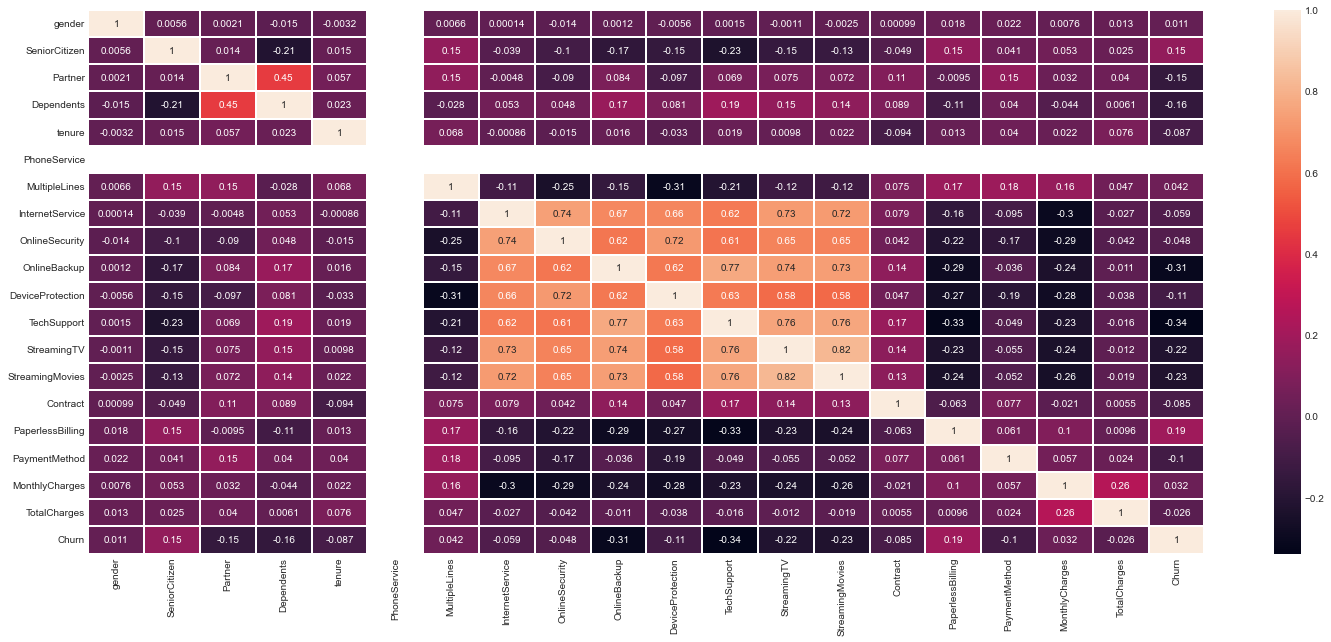

In [45]:
plt.figure(figsize=(25, 10))

corr = new_df.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2)

<AxesSubplot:>

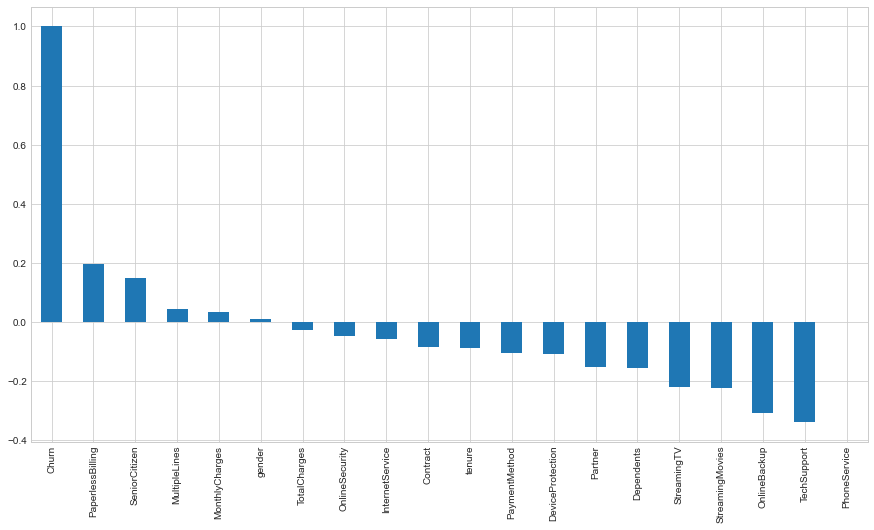

In [46]:
#Plotting correlation of target variables with other columns:

plt.figure(figsize=(15,8))
corr['Churn'].sort_values(ascending = False).plot(kind='bar')

- Psitively correlated columns - 'PaperlessBilling','SeniorCitizen','MultipleLines','MonthlyCharges','gender'

- Negatively correlated columns - 'TotalCharges','OnlineSecurity','InternetServices','Contract','tenure','PaymentMethod','DeviceProtection','Partner','Dependents','StramingTV','StreamingMovies','OnlineBackup','TechSupport'

# Data Visualization

#### Countplot

- gender vs Churn


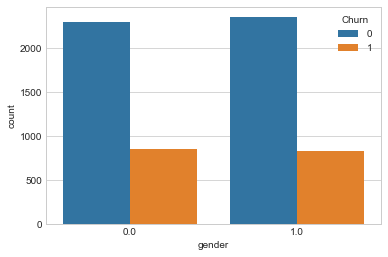

<Figure size 1080x504 with 0 Axes>

- SeniorCitizen vs Churn


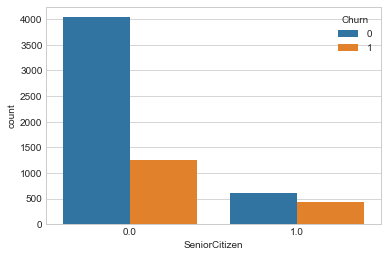

<Figure size 1080x504 with 0 Axes>

- Partner vs Churn


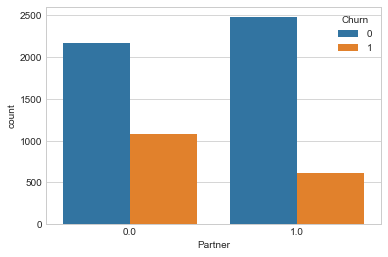

<Figure size 1080x504 with 0 Axes>

- Dependents vs Churn


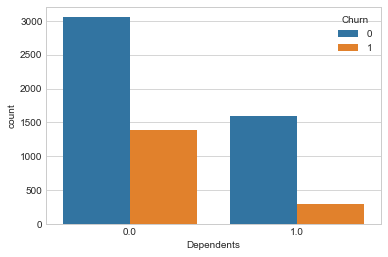

<Figure size 1080x504 with 0 Axes>

- tenure vs Churn


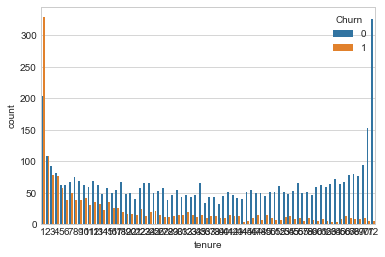

<Figure size 1080x504 with 0 Axes>

- PhoneService vs Churn


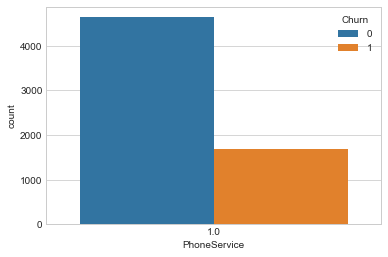

<Figure size 1080x504 with 0 Axes>

- MultipleLines vs Churn


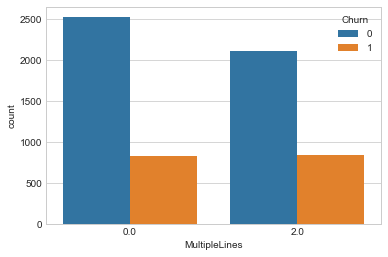

<Figure size 1080x504 with 0 Axes>

- InternetService vs Churn


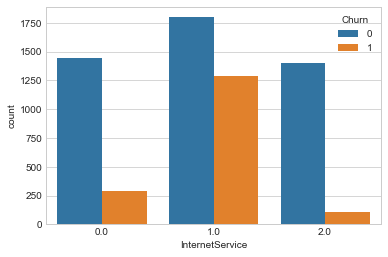

<Figure size 1080x504 with 0 Axes>

- OnlineSecurity vs Churn


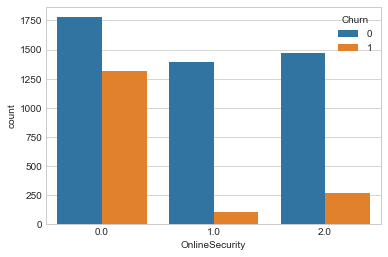

<Figure size 1080x504 with 0 Axes>

- OnlineBackup vs Churn


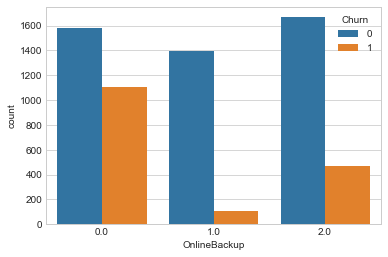

<Figure size 1080x504 with 0 Axes>

- DeviceProtection vs Churn


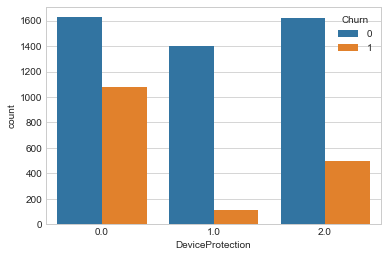

<Figure size 1080x504 with 0 Axes>

- TechSupport vs Churn


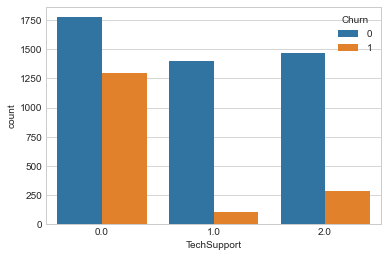

<Figure size 1080x504 with 0 Axes>

- StreamingTV vs Churn


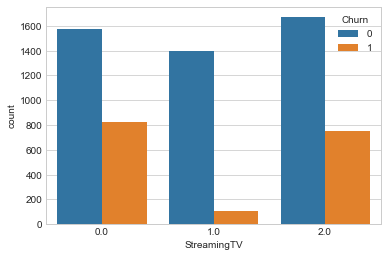

<Figure size 1080x504 with 0 Axes>

- StreamingMovies vs Churn


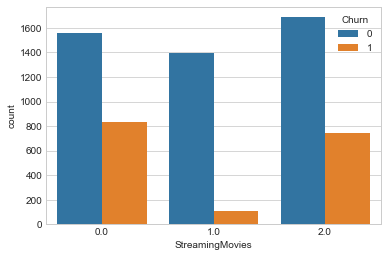

<Figure size 1080x504 with 0 Axes>

- Contract vs Churn


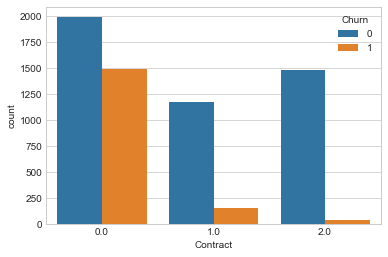

<Figure size 1080x504 with 0 Axes>

- PaperlessBilling vs Churn


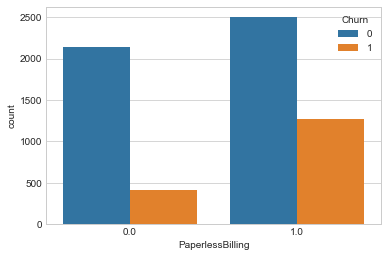

<Figure size 1080x504 with 0 Axes>

- PaymentMethod vs Churn


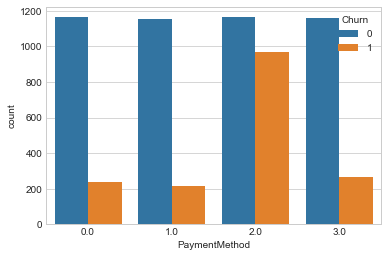

<Figure size 1080x504 with 0 Axes>

- MonthlyCharges vs Churn


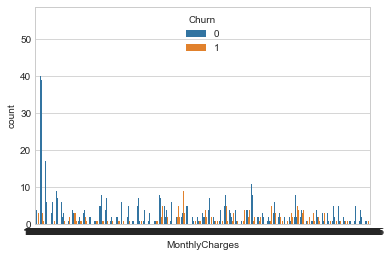

<Figure size 1080x504 with 0 Axes>

- TotalCharges vs Churn


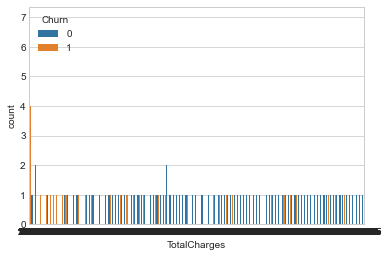

<Figure size 1080x504 with 0 Axes>

- Churn vs Churn


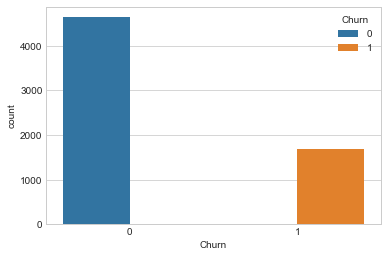

<Figure size 1080x504 with 0 Axes>

In [47]:
for col in numerical_cols:
    print("-",col,"vs Churn")
    ax=sns.countplot(x=str(col), hue='Churn',data = new_df)
    plt.figure(figsize=(15,7))
    (ax,new_df.gender,1,1)
    plt.tight_layout()
    plt.show()

Above count plot shows us the count of each column with respect to 'Churn'

- 0.0, 1.0 and 2.0 on x-scale reflects the the data in the columns and 0 & 1 with orange and blue colours reflects the YES or NO with respect to 'Churn'

#### Pie Chart

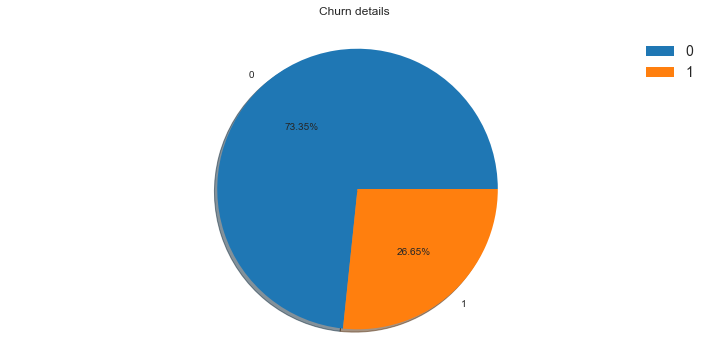

In [48]:
plt.figure(figsize=(10,5))
plt.pie(new_df['Churn'].value_counts(), labels=new_df['Churn'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Churn details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- In case of 'Churn' we can see that 'No' is greater in number i.e 73.35% of customers are not Churn.

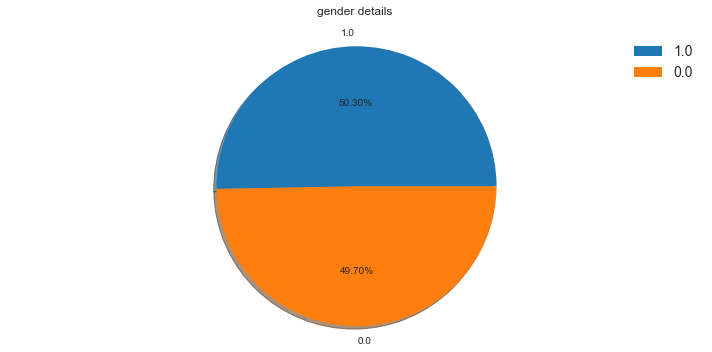

In [49]:
plt.figure(figsize=(10,5))
plt.pie(new_df['gender'].value_counts(), labels=new_df['gender'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('gender details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- We can see that Male and Female are mostly equal in number.

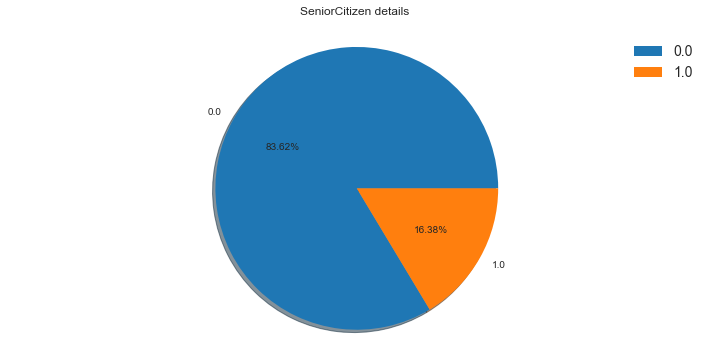

In [50]:
plt.figure(figsize=(10,5))
plt.pie(new_df['SeniorCitizen'].value_counts(), labels=new_df['SeniorCitizen'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('SeniorCitizen details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- We can see that 83.62% customers are not SeniorCitizen.

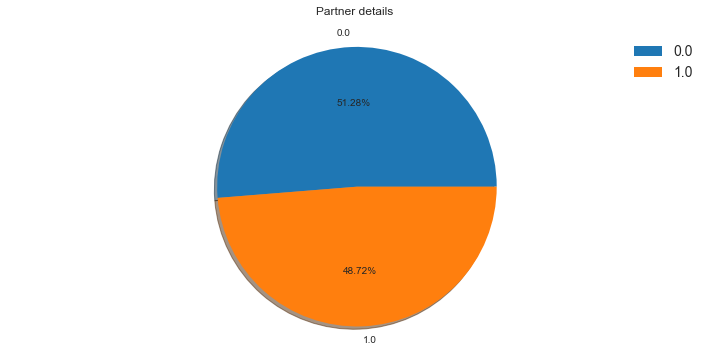

In [51]:
plt.figure(figsize=(10,5))
plt.pie(new_df['Partner'].value_counts(), labels=new_df['Partner'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Partner details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- 51.28% customers have partners and 48.72% customers do not have partners.

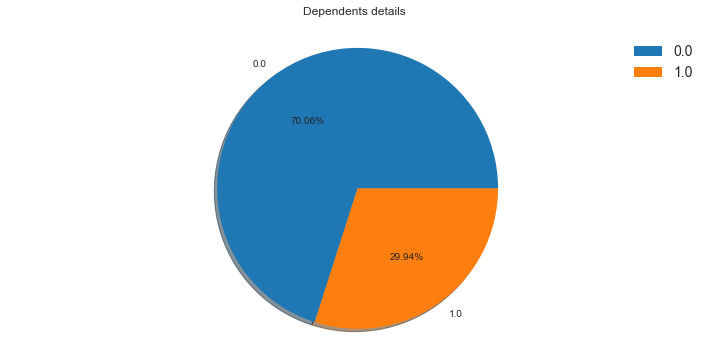

In [52]:
plt.figure(figsize=(10,5))
plt.pie(new_df['Dependents'].value_counts(), labels=new_df['Dependents'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Dependents details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- We can see that 70% customers do not have dependents

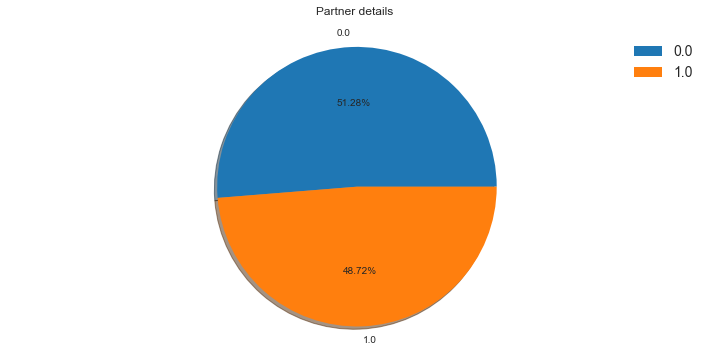

In [53]:
plt.figure(figsize=(10,5))
plt.pie(new_df['Partner'].value_counts(), labels=new_df['Partner'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('Partner details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- We can see almost half of the customers have partners

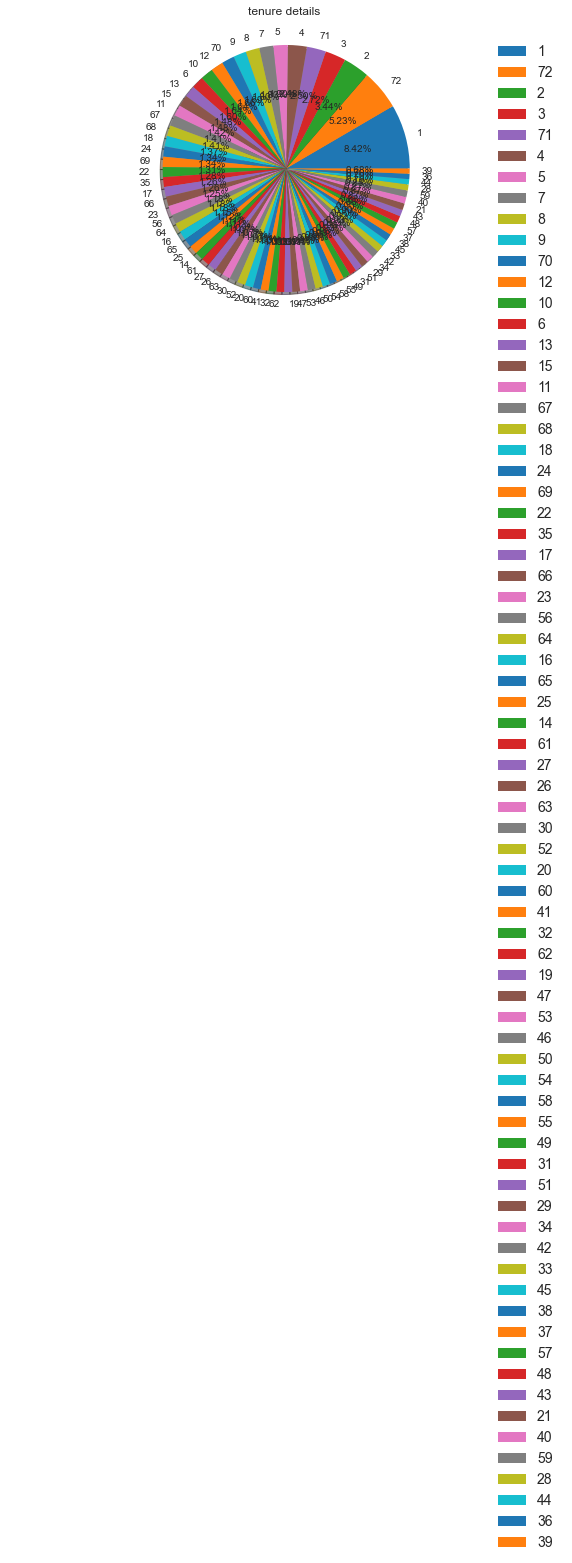

In [54]:
plt.figure(figsize=(10,5))
plt.pie(new_df['tenure'].value_counts(), labels=new_df['tenure'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('tenure details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- If we check piechart for 'tenure' column then we will get this type of piechart reflcting many data

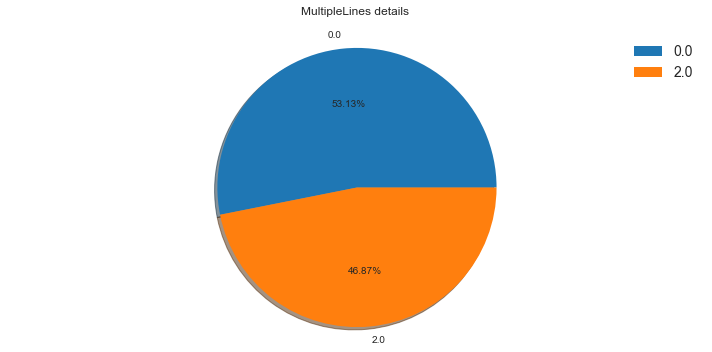

In [55]:
plt.figure(figsize=(10,5))
plt.pie(new_df['MultipleLines'].value_counts(), labels=new_df['MultipleLines'].value_counts().index, 
        shadow=True, autopct='%1.2f%%')
plt.title('MultipleLines details \n')
plt.legend(prop={'size':14})
plt.axis('equal')
plt.tight_layout()
plt.show()

- Almost 53.13% customers have no multipleline service.

#### Pairplot

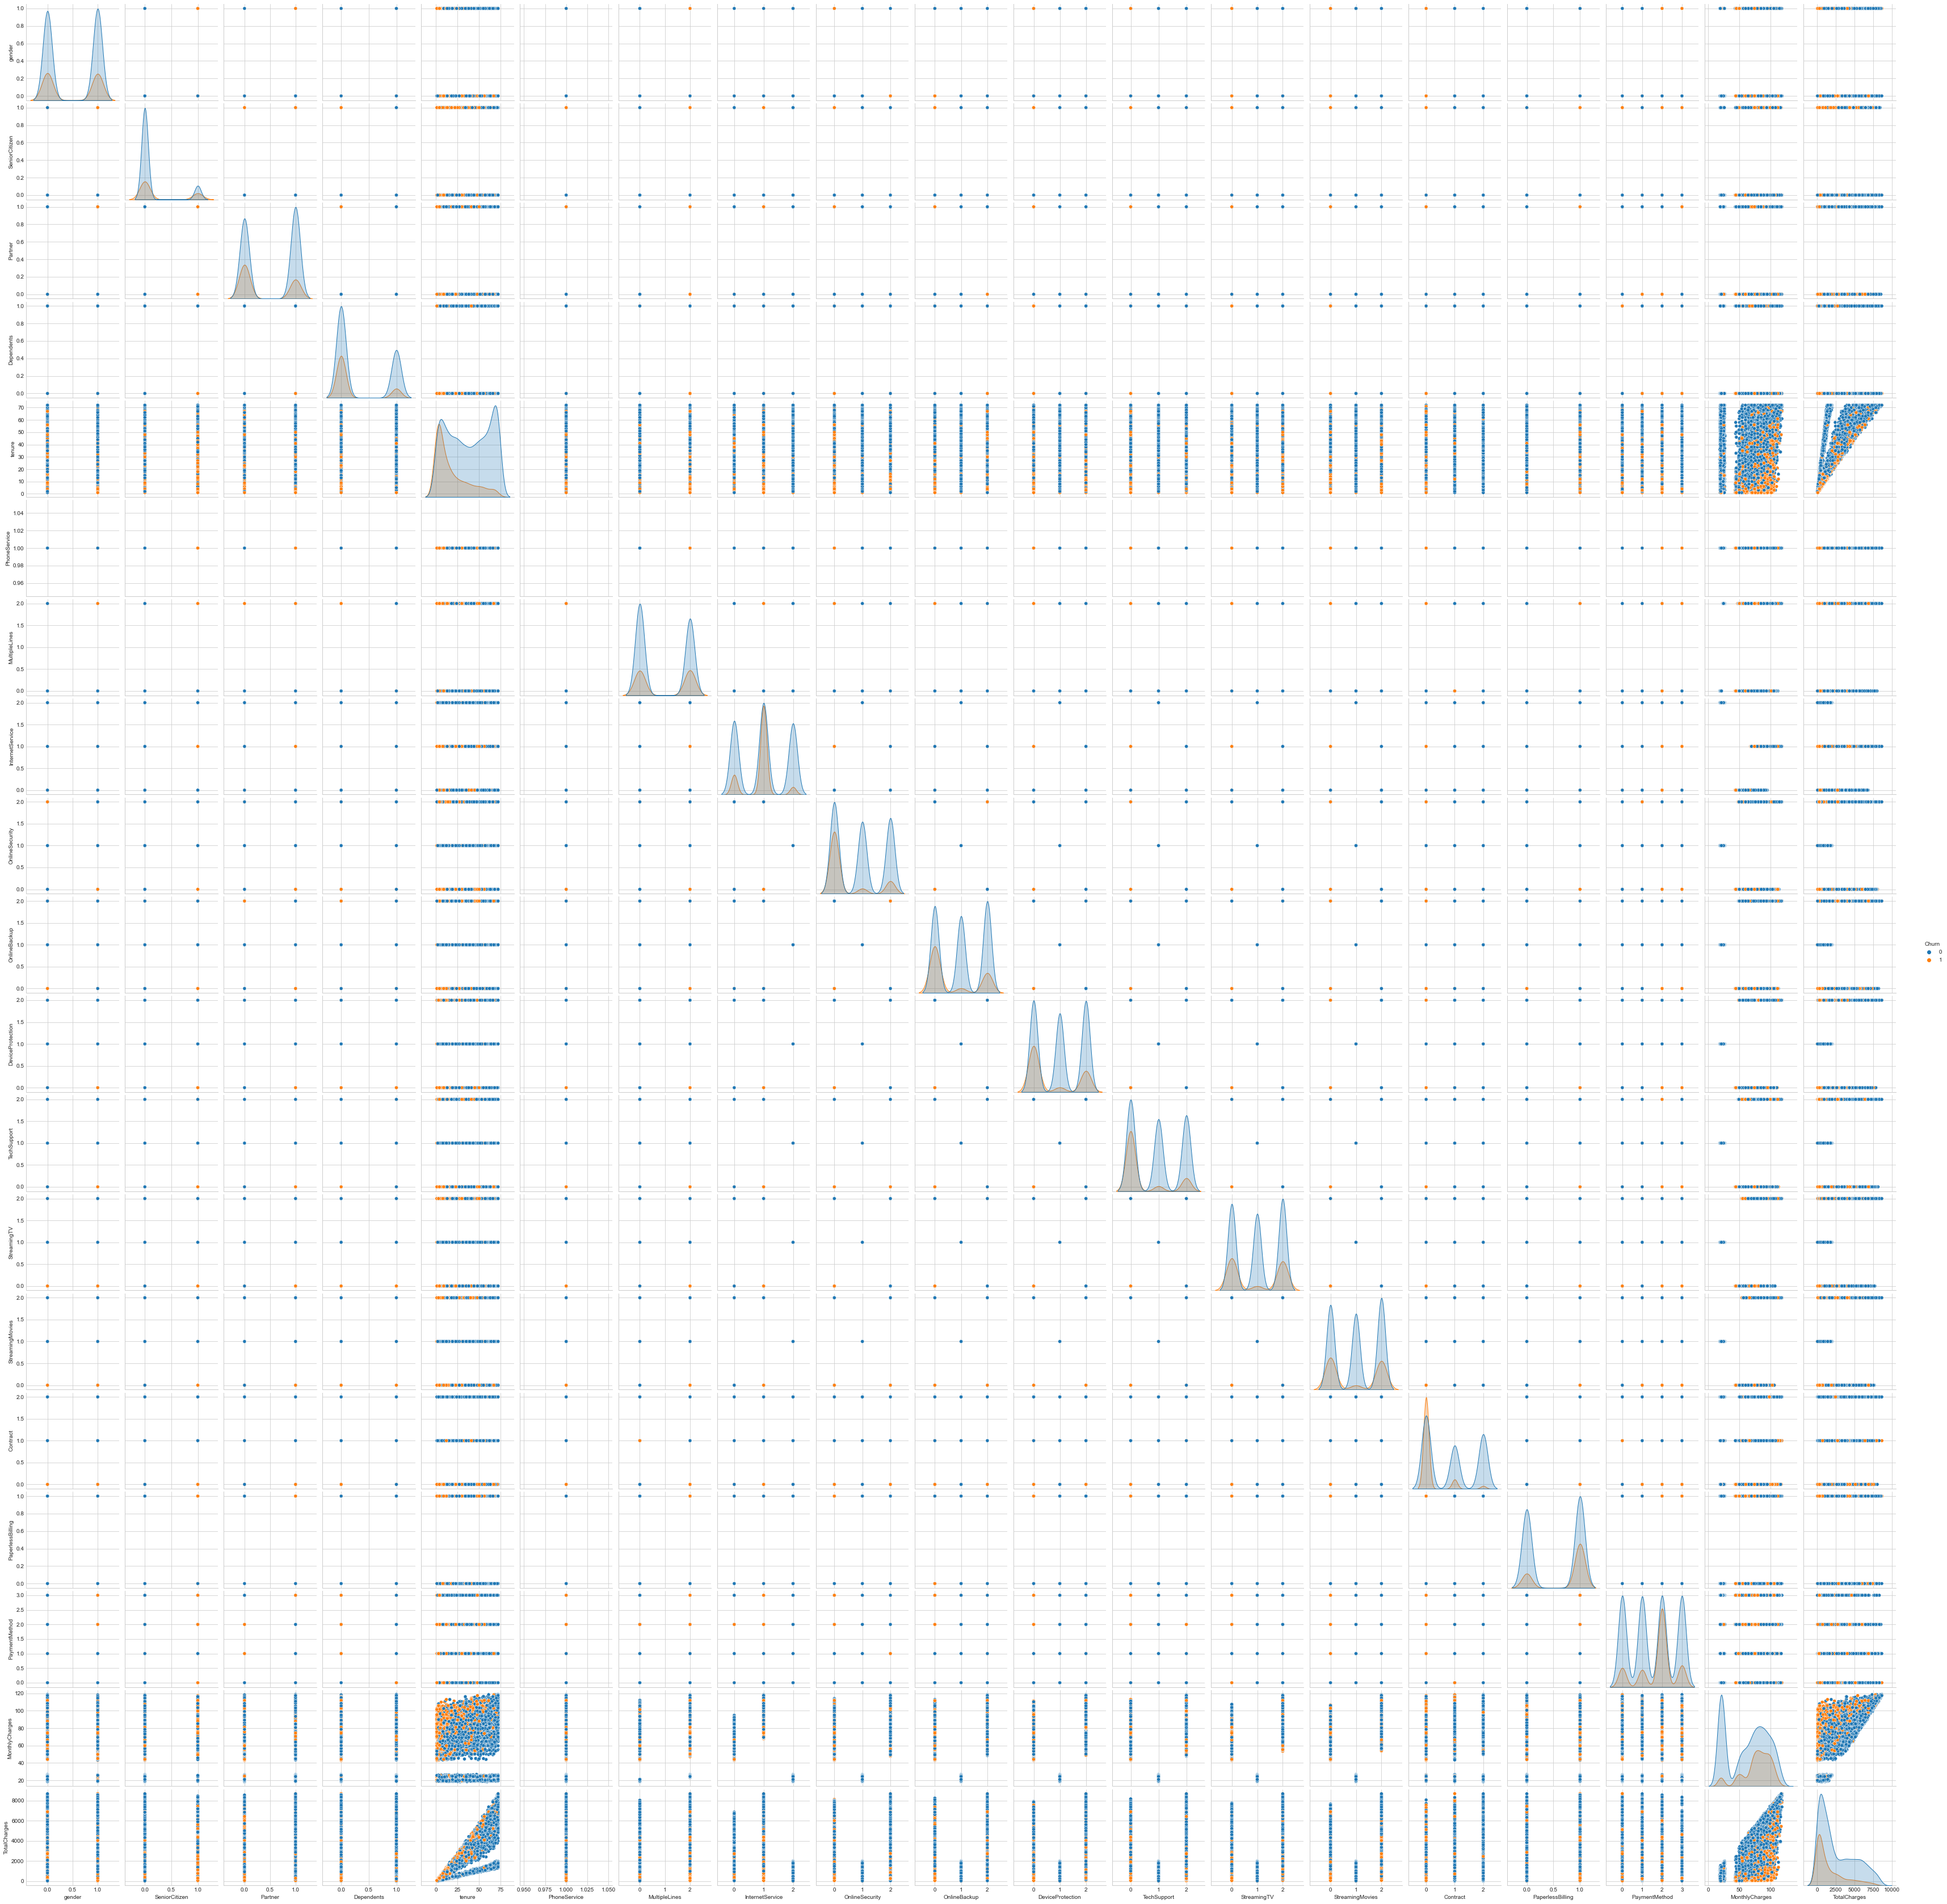

In [56]:
sns.pairplot(new_df, hue='Churn', diag_kind='kde')
plt.show()

- We are not able to visualize using pairplot that how the datapoints are distributed in each of the numerical data columns

#### Scatterplot

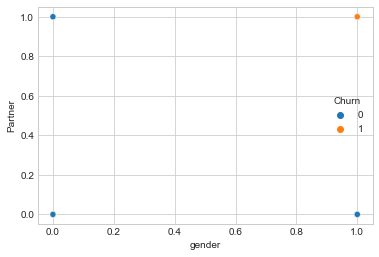

In [57]:
sns.scatterplot(x = "gender", y = "Partner" ,hue='Churn', data = new_df)
plt.show()

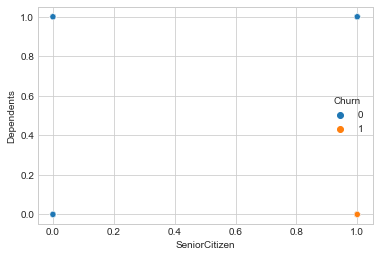

In [58]:
sns.scatterplot(x = "SeniorCitizen", y = "Dependents" ,hue='Churn', data = new_df)
plt.show()

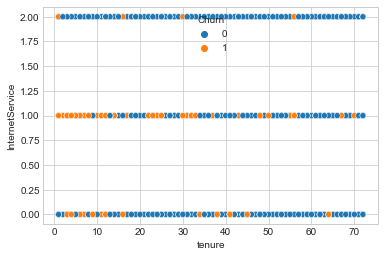

In [59]:
sns.scatterplot(x = "tenure", y = "InternetService" ,hue='Churn', data = new_df)
plt.show()

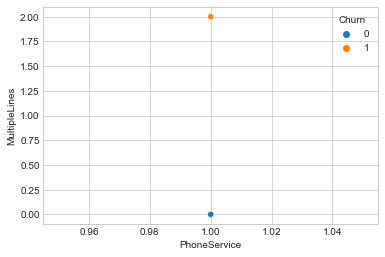

In [60]:
sns.scatterplot(x = "PhoneService", y = "MultipleLines" ,hue='Churn', data = new_df)
plt.show()

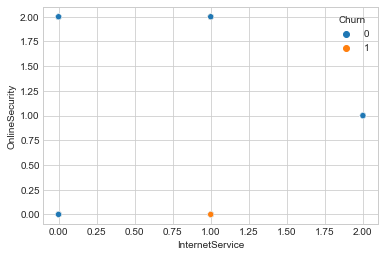

In [61]:
sns.scatterplot(x = "InternetService", y = "OnlineSecurity" ,hue='Churn', data = new_df)
plt.show()

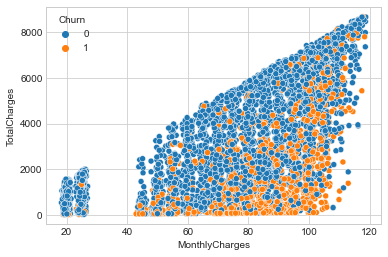

In [62]:
sns.scatterplot(x = "MonthlyCharges", y = "TotalCharges" ,hue='Churn', data = new_df)
plt.show()

#### Bar Plot

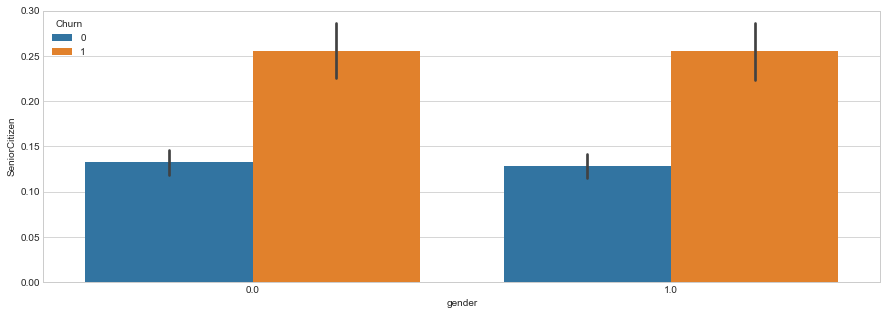

In [63]:
plt.figure(figsize = (15,5))
sns.barplot(x = "gender", y = "SeniorCitizen", data = new_df ,hue='Churn')
plt.show()

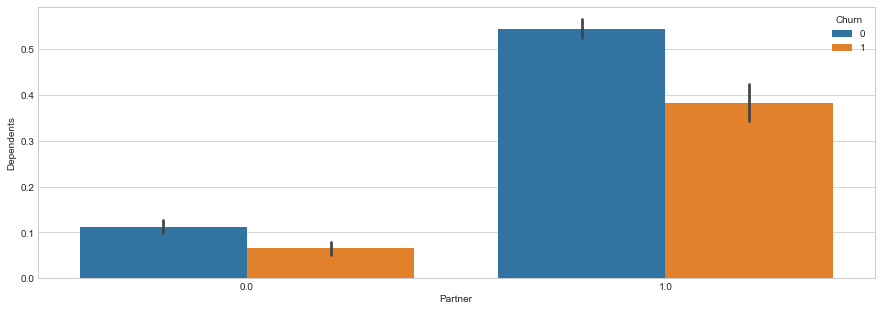

In [64]:
plt.figure(figsize = (15,5))
sns.barplot(x = "Partner", y = "Dependents", data = new_df ,hue='Churn')
plt.show()

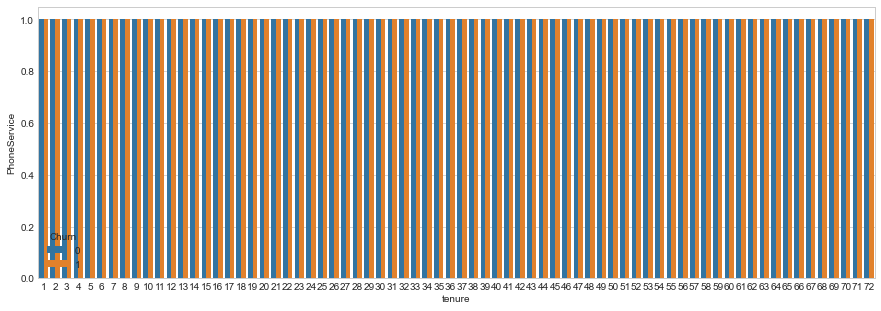

In [65]:
plt.figure(figsize = (15,5))
sns.barplot(x = "tenure", y = "PhoneService", data = new_df ,hue='Churn')
plt.show()

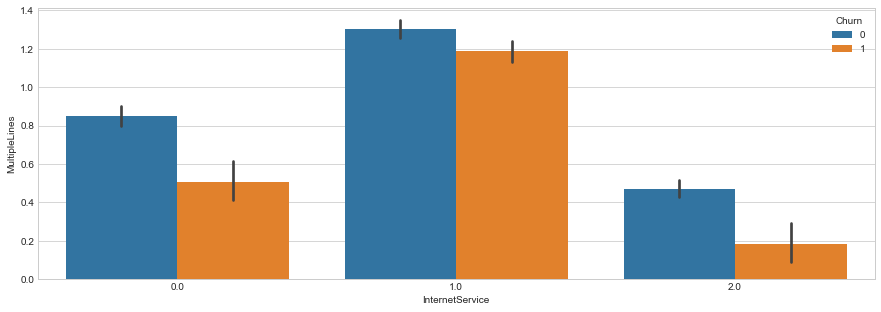

In [66]:
plt.figure(figsize = (15,5))
sns.barplot(x = "InternetService", y = "MultipleLines", data = new_df ,hue='Churn')
plt.show()

#### Distribution plot

<AxesSubplot:xlabel='gender', ylabel='Density'>

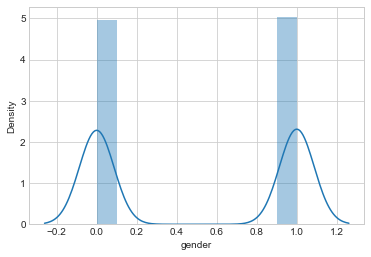

In [67]:
sns.distplot(new_df['gender'])

In [68]:
numerical_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

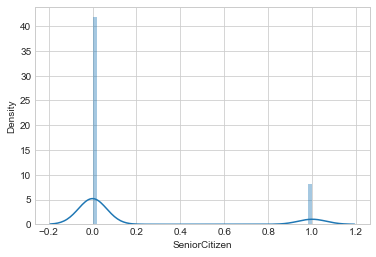

In [69]:
sns.distplot(new_df['SeniorCitizen'])

<AxesSubplot:xlabel='Partner', ylabel='Density'>

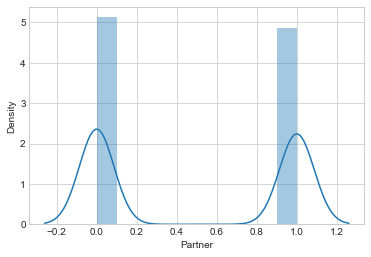

In [70]:
sns.distplot(new_df['Partner'])

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

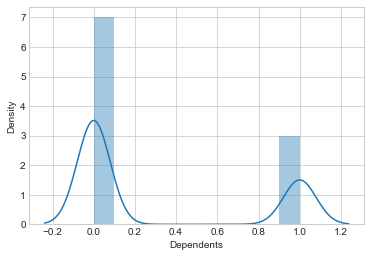

In [71]:
sns.distplot(new_df['Dependents'])

<AxesSubplot:xlabel='tenure', ylabel='Density'>

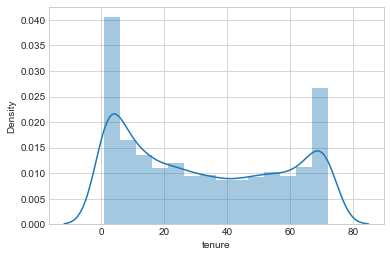

In [72]:
sns.distplot(new_df['tenure'])

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

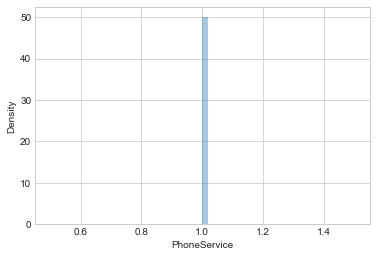

In [73]:
sns.distplot(new_df['PhoneService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

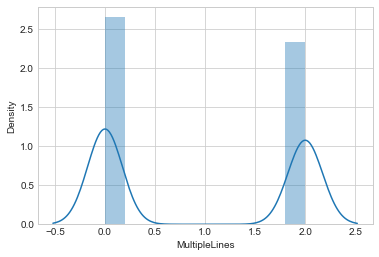

In [74]:
sns.distplot(new_df['MultipleLines'])

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

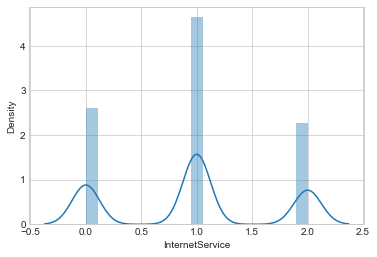

In [75]:
sns.distplot(new_df['InternetService'])

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

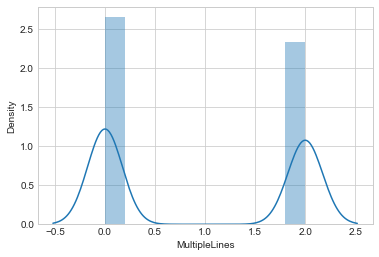

In [76]:
sns.distplot(new_df['MultipleLines'])

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

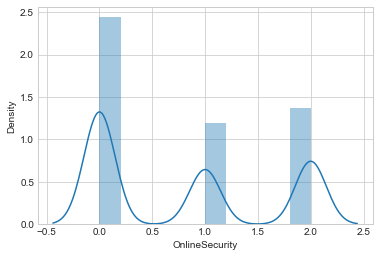

In [77]:
sns.distplot(new_df['OnlineSecurity'])

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

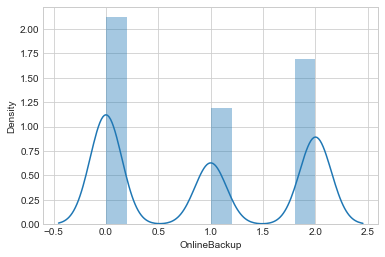

In [78]:
sns.distplot(new_df['OnlineBackup'])

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

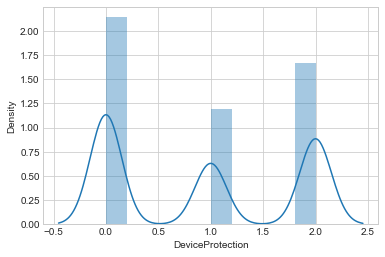

In [79]:
sns.distplot(new_df['DeviceProtection'])

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

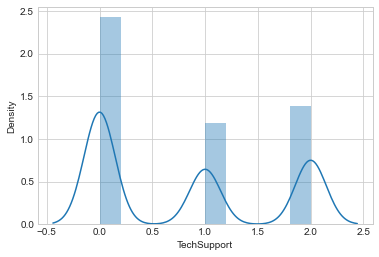

In [80]:
sns.distplot(new_df['TechSupport'])

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

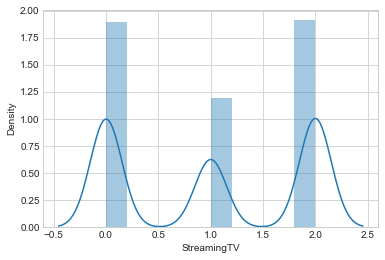

In [81]:
sns.distplot(new_df['StreamingTV'])

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

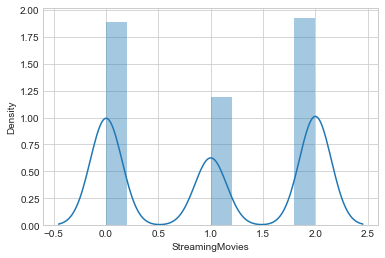

In [82]:
sns.distplot(new_df['StreamingMovies'])

<AxesSubplot:xlabel='Contract', ylabel='Density'>

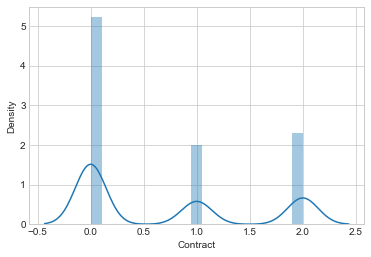

In [83]:
sns.distplot(new_df['Contract'])

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

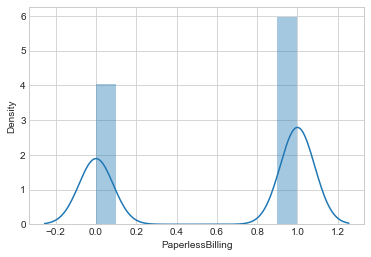

In [84]:
sns.distplot(new_df['PaperlessBilling'])

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

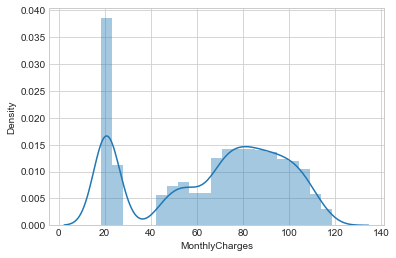

In [85]:
sns.distplot(new_df['MonthlyCharges'])

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

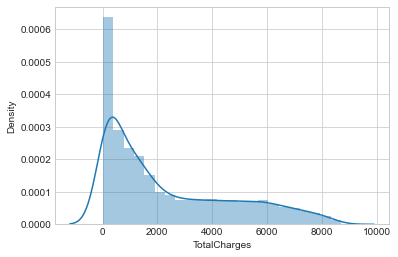

In [86]:
sns.distplot(new_df['TotalCharges'])

### Lets plot skewness of the dataset using distributionplot

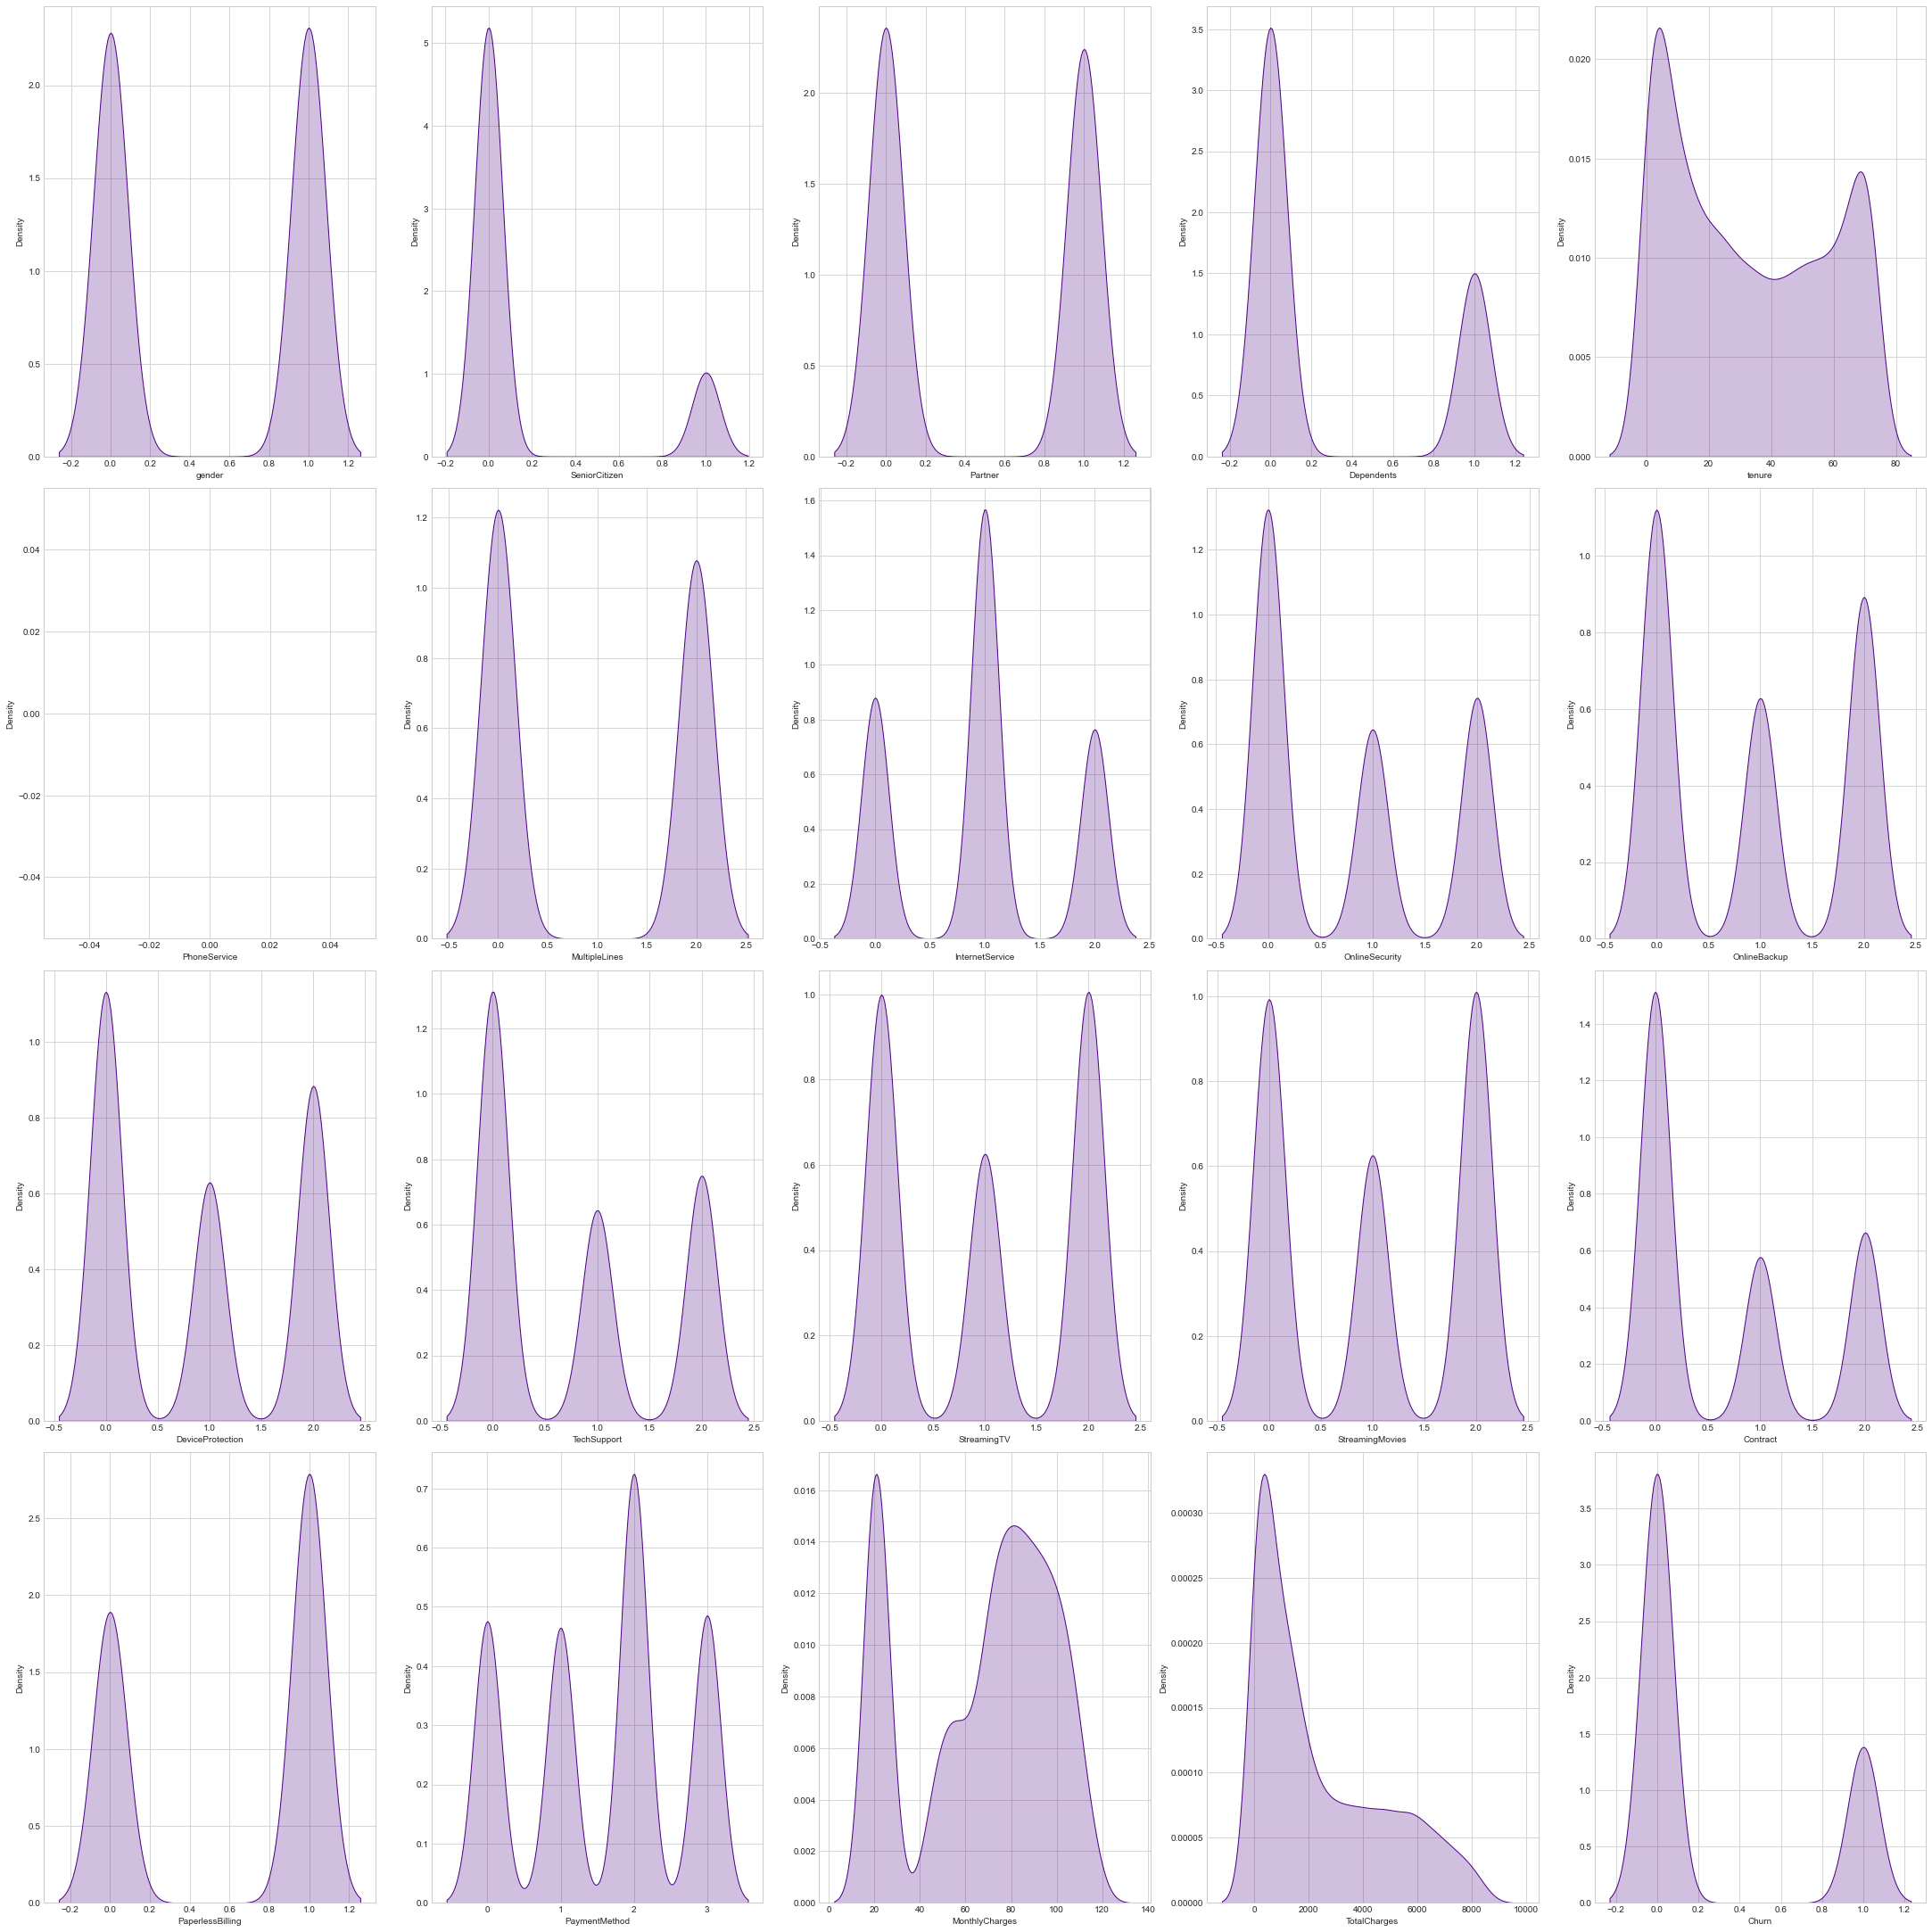

In [87]:
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(30,30))
index = 0
ax = ax.flatten()
for col, value in new_df[numerical_cols].items():
    sns.distplot(value, ax=ax[index], hist=False, color="indigo", kde_kws={"shade": True})
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.4, h_pad=1.0)
plt.show()

- We can see that there is skewness in some columns.

#### Histogram

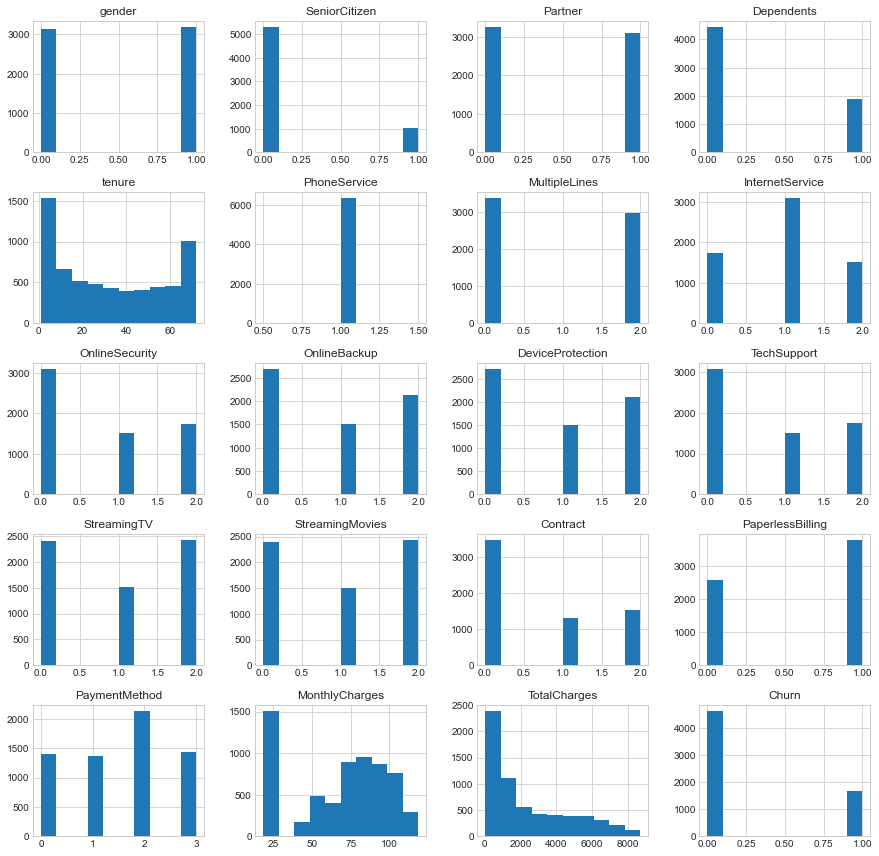

In [88]:
new_df.hist(figsize=(15,15))
plt.show()

# Seperating Label "y" and Features "x"

In [89]:
X = new_df.drop('Churn', axis=1)
Y = new_df['Churn']

### Checking the class Imbalance issue

In [90]:
Y.value_counts()

0    4643
1    1687
Name: Churn, dtype: int64

- The value count of our target variable is imbalanced, we will now oversample it by using smote.

In [91]:
import imblearn

from imblearn.over_sampling import SMOTE
SM = SMOTE()
X,Y = SM.fit_resample(X,Y)

In [92]:
Y.value_counts()

0    4643
1    4643
Name: Churn, dtype: int64

- Now the data is balanced.

# Feature Scaling

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

gender  SeniorCitizen   Partner  Dependents    tenure  PhoneService  \
0  1.055335      -0.518585 -0.929672   -0.610695  0.260119           0.0   
1  1.055335      -0.518585 -0.929672   -0.610695 -1.073769           0.0   
2 -1.050991      -0.518585 -0.929672   -0.610695 -1.073769           0.0   
3 -1.050991      -0.518585 -0.929672   -0.610695 -0.823665           0.0   
4  1.055335      -0.518585 -0.929672    1.769320 -0.240089           0.0   

   MultipleLines  InternetService  OnlineSecurity  OnlineBackup  \
0      -0.997281        -1.482589        1.682438     -0.962233   
1      -0.997281        -1.482589        1.682438      1.391490   
2      -0.997281         0.086101       -0.804359     -0.962233   
3       1.074490         0.086101       -0.804359     -0.962233   
4       1.074490         0.086101       -0.804359      1.391490   

   DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  \
0          1.375612    -0.812596    -1.144487        -1.136232  0.636107   
1         -0.969427    -0.812596    -1.144487        -1.136232 -0.672228   
2         -0.969427    -0.812596    -1.144487        -1.136232 -0.672228   
3          1.375612    -0.812596     1.145697         1.150279 -0.672228   
4         -0.969427    -0.812596     1.145697        -1.136232 -0.672228   

   PaperlessBilling  PaymentMethod  MonthlyCharges  TotalCharges  
0         -1.418478       1.398414       -0.501584     -0.106188  
1          0.759989       1.398414       -0.610737     -0.901862  
2          0.759989       0.377022       -0.017441     -0.882432  
3          0.759989       0.377022        1.001902     -0.583677  
4          0.759989      -0.644369        0.630432     -0.079432

# Checking VIF(Variance Inflation Factor) values:

In [94]:
#importing VIF from statsmodels:

from statsmodels.stats.outliers_influence import variance_inflation_factor

#Checking VIF
vif = pd.DataFrame()
vif["VIF values"] = [variance_inflation_factor(X.values,i)
              for i in range(len(X.columns))]
vif["Features"] = X.columns
vif

VIF values          Features
0     1.005310            gender
1     1.157763     SeniorCitizen
2     1.499959           Partner
3     1.403665        Dependents
4     9.608523            tenure
5          NaN      PhoneService
6     1.453059     MultipleLines
7     1.451830   InternetService
8     1.315885    OnlineSecurity
9     1.275620      OnlineBackup
10    1.326453  DeviceProtection
11    1.385031       TechSupport
12    1.501309       StreamingTV
13    1.489200   StreamingMovies
14    2.653765          Contract
15    1.244033  PaperlessBilling
16    1.190920     PaymentMethod
17    4.362653    MonthlyCharges
18   11.607444      TotalCharges

- We can observe that only 'TotalCharges' column has VIF greater than 10.

# MODEL BUILDING:

In [96]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb

In [97]:
maxAccu=0
maxRS=0

for i in range(1, 1000):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train, Y_train)
    pred = lr.predict(X_test)
    acc_score = (accuracy_score(Y_test, pred))*100
    
    if acc_score>maxAccu:
        maxAccu=acc_score
        maxRS=i

print("Best accuracy score is", maxAccu,"on Random State", maxRS)

Best accuracy score is 80.53402239448751 on Random State 316


Best accuracy score is 80.53% and random state is 316.

# Feature Importance

Importance
Features                    
MonthlyCharges         0.124
TotalCharges           0.123
Contract               0.120
tenure                 0.119
OnlineSecurity         0.090
TechSupport            0.074
PaymentMethod          0.051
PaperlessBilling       0.046
Partner                0.038
InternetService        0.032
Dependents             0.029
gender                 0.028
OnlineBackup           0.028
SeniorCitizen          0.024
MultipleLines          0.020
DeviceProtection       0.018
StreamingTV            0.017
StreamingMovies        0.016
PhoneService           0.000

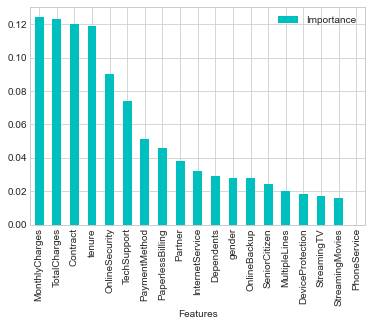

In [98]:
rf=RandomForestClassifier()

rf.fit(X_train, Y_train)

importance = pd.DataFrame({'Features':X.columns, 'Importance':np.round(rf.feature_importances_,3)})
importance = importance.sort_values('Importance', ascending=False).set_index('Features')
importance.plot.bar(color='c')
importance

- In this way we are able to check which of the feature column is more important to our target variable.

- From the above observations we can see that 

Most important columns are :
   ##### 'Contract','TotalCharges','tenure','MonthlyCharges','OnlineSecurity','TechSupport','PaperlessBilling','PaymentMethod','InternetService','Partner'

Least important columns are:
   ##### 'Gender','OnlineBackup','SeniorCitizen','Dependents','DeviceProtection','MultipleLines','StreamingTV','StreaminMovies','PhoneService'

# Building Machine Learning Classification Model

In [99]:
# Classification Model Function

def classify(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=112)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

In [101]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.75      0.78      1362
           1       0.78      0.82      0.80      1424

    accuracy                           0.79      2786
   macro avg       0.79      0.79      0.79      2786
weighted avg       0.79      0.79      0.79      2786

Accuracy Score: 78.60732232591529
Cross Validation Score: 77.99921514207726

Accuracy Score - Cross Validation Score is 0.6081071838380296


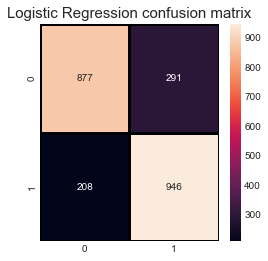

In [102]:
plt.figure(figsize=(4,4))
sns.heatmap(confusion_matrix(Y_test, pred),
                annot=True,fmt = "d",linecolor="k",linewidths=3)
    
plt.title("Logistic Regression confusion matrix",fontsize=15)
plt.show()

In [106]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.85      0.83      1362
           1       0.85      0.82      0.83      1424

    accuracy                           0.83      2786
   macro avg       0.83      0.83      0.83      2786
weighted avg       0.83      0.83      0.83      2786

Accuracy Score: 83.23761665470208
Cross Validation Score: 81.43529298560765

Accuracy Score - Cross Validation Score is 1.8023236690944344


In [107]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      1362
           1       0.81      0.83      0.82      1424

    accuracy                           0.81      2786
   macro avg       0.81      0.81      0.81      2786
weighted avg       0.81      0.81      0.81      2786

Accuracy Score: 81.04809763101221
Cross Validation Score: 80.4126068818244

Accuracy Score - Cross Validation Score is 0.6354907491878095


In [108]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.86      1362
           1       0.88      0.85      0.86      1424

    accuracy                           0.86      2786
   macro avg       0.86      0.86      0.86      2786
weighted avg       0.86      0.86      0.86      2786

Accuracy Score: 86.36037329504667
Cross Validation Score: 84.45119940086474

Accuracy Score - Cross Validation Score is 1.909173894181933


In [109]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75      1362
           1       0.74      0.90      0.81      1424

    accuracy                           0.78      2786
   macro avg       0.80      0.78      0.78      2786
weighted avg       0.80      0.78      0.78      2786

Accuracy Score: 78.35606604450825
Cross Validation Score: 78.10695631054173

Accuracy Score - Cross Validation Score is 0.24910973396652025


In [110]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.88      0.86      1362
           1       0.88      0.85      0.86      1424

    accuracy                           0.86      2786
   macro avg       0.86      0.86      0.86      2786
weighted avg       0.86      0.86      0.86      2786

Accuracy Score: 86.10911701363962
Cross Validation Score: 84.61266334058486

Accuracy Score - Cross Validation Score is 1.4964536730547593


In [111]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)


Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85      1362
           1       0.87      0.84      0.86      1424

    accuracy                           0.85      2786
   macro avg       0.85      0.85      0.85      2786
weighted avg       0.86      0.85      0.85      2786

Accuracy Score: 85.46302943287868
Cross Validation Score: 83.50377618680778

Accuracy Score - Cross Validation Score is 1.959253246070901


# Hyper parameter tuning on the best Classification ML Model

From above all the classification models, I am selecting Random Forest Classifier as my best model.

In [121]:
Parameters = {'criterion' : ['gini', 'entropy', 'log_loss'],
              'n_estimators' : [10,25,40,50,75,100],
              'min_samples_split' : [22.2,33.3,44,4,55.5,77,7],
              'max_depth' : [0, 20, 40,60,80,100],
              'max_features' : ['sqrt', 'log2', 'None']
             }

In [122]:
GSCV = GridSearchCV(RandomForestClassifier(), Parameters, cv=7)

In [124]:
GSCV.fit(X_train,Y_train)

GridSearchCV(cv=7, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [0, 20, 40, 60, 80, 100],
                         'max_features': ['sqrt', 'log2', 'None'],
                         'min_samples_split': [22.2, 33.3, 44, 4, 55.5, 77, 7],
                         'n_estimators': [10, 25, 40, 50, 75, 100]})

In [125]:
# Now lets get the results

print(GSCV.best_params_)

{'criterion': 'gini', 'max_depth': 100, 'max_features': 'log2', 'min_samples_split': 7, 'n_estimators': 75}


In [126]:
Final_Model = RandomForestClassifier(criterion='gini', max_features ='log2', min_samples_split = 7, n_estimators = 75)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_acc = (accuracy_score(Y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)

Accuracy score for the Best Model is: 85.65891472868216


##### I have successfully completed the Hyper Parameter Tuning on my Final Model and received the accuracy score as 85%.

# AUC ROC Curve

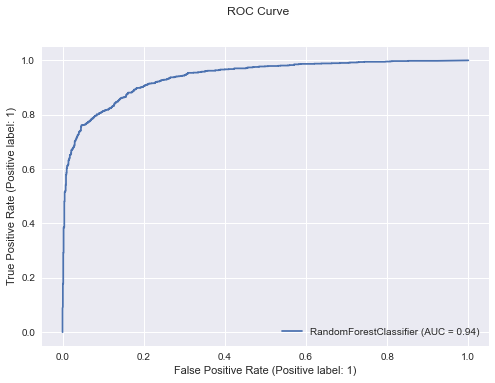

In [127]:
from sklearn import metrics

plt.style.use('seaborn')
disp = metrics.plot_roc_curve(Final_Model, X_test, Y_test)
disp.figure_.suptitle("ROC Curve")
plt.show()

### AUC-ROC curve gives accuracy score as 94%

# Confusion Matrix

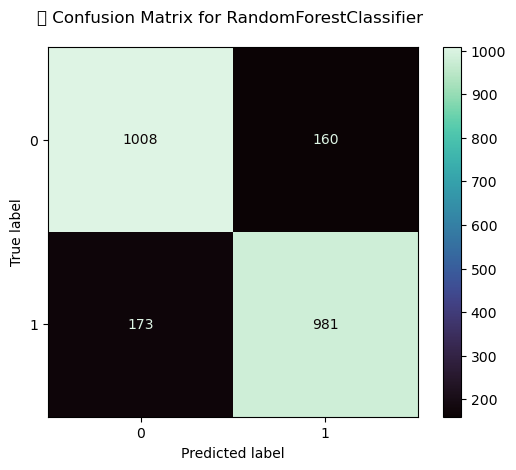

In [128]:
plt.style.use('default')
class_names = new_df.columns
metrics.plot_confusion_matrix(Classifier, X_test, Y_test, cmap='mako')
plt.title('\t Confusion Matrix for RandomForestClassifier \n')
plt.show()

- The above confusion matrix gives me a clear idea about no. of correct outputs and no of incorrect outputs(ML missed to give the correct prediction which is seen in the black box)

# Saving the model

In [129]:
import pickle

In [131]:
filename = "Final_Customer_Churn_Analysis.pkl"
pickle.dump(rf, open(filename,'wb'))

# Loading The Model

In [134]:
loadmodel = pickle.load(open('Final_Customer_Churn_Analysis.pkl', 'rb'))

In [136]:
a = np.array(Y_test)
pred = np.array(model.predict(X_test))
df_final = pd.DataFrame({"Original":a,"Predicted":pred},index=range(len(a)))
df_final

Original  Predicted
0            1          0
1            0          0
2            1          1
3            0          0
4            1          1
...        ...        ...
2317         0          0
2318         0          0
2319         1          1
2320         0          0
2321         1          1

[2322 rows x 2 columns]

- The above dataframe has original and predicted data from the best model.